# Exploring the different regridded versions of the GCM data

## Load some import constants

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cftime

In [2]:
# Our two different projections
cp_model_rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
platecarree = ccrs.PlateCarree()

In [3]:
def plot_with_ts(slices, timestamps, variable='pr'):
    f, axes = plt.subplots(len(timestamps), len(slices), figsize=(20, 20), subplot_kw={'projection': cp_model_rotated_pole})
    f.tight_layout(h_pad=2)
    # make sure axes is 2-d even if only 1 timestamp and or slice
    axes = axes.reshape(len(timestamps),len(slices))
    
    for t, timestamp in enumerate(timestamps):
        for i, data in enumerate(slices):
            ax = axes[t][i]
            ax.coastlines()
            
            x = "longitude"
            y = "latitude"
            transform = platecarree
            if "grid_latitude" in data.coords.keys():
                x = f"grid_longitude"
                y = f"grid_latitude"
                transform = cp_model_rotated_pole
            
            data.sel(time=timestamp)[variable].plot(ax=ax, x=x, y=y, add_colorbar=True, transform = transform, vmin=0)

    plt.show()

## Load the different datasets

In [4]:
orig_gcm_data = xr.open_mfdataset("../../../../data/60km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
gcm_data = xr.open_mfdataset("../../../../derived_data/60km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
cpm_data = xr.open_mfdataset("../../../../data/2.2km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))

regridded_nn_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-nn-regrid-2.2km/rcp85/01/pr/day/*-198*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
regridded_lin_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-lin-regrid-2.2km/rcp85/01/pr/day/*-198*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))

In [5]:
five_wettest_gcm_days = gcm_data.sum(dim=["projection_x_coordinate", "projection_y_coordinate"]).sortby('pr').time[-5:]
five_wettest_regridded_nn_gcm_days = regridded_nn_gcm_data.sum(dim=["grid_latitude", "grid_longitude"]).sortby('pr').time[-5:]
five_wettest_regridded_lin_gcm_days = regridded_lin_gcm_data.sum(dim=["grid_latitude", "grid_longitude"]).sortby('pr').time[-5:]
five_wettest_cpm_days = cpm_data.sum(dim=["grid_latitude", "grid_longitude"]).sortby('pr').time[-5:]

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 185 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 185 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 185 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 185 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order in

# Compare wettest days

In [6]:
five_wettest_gcm_days.values

array([cftime.Datetime360Day(1982, 11, 24, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 12, 8, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 6, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 26, 12, 0, 0, 0),
       cftime.Datetime360Day(1982, 11, 12, 12, 0, 0, 0)], dtype=object)

In [7]:
five_wettest_cpm_days.values

array([cftime.Datetime360Day(1980, 12, 8, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 7, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 29, 12, 0, 0, 0),
       cftime.Datetime360Day(1982, 11, 12, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 26, 12, 0, 0, 0)], dtype=object)

In [8]:
five_wettest_regridded_nn_gcm_days.values

array([cftime.Datetime360Day(1982, 11, 24, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 12, 8, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 6, 12, 0, 0, 0),
       cftime.Datetime360Day(1982, 11, 12, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 26, 12, 0, 0, 0)], dtype=object)

In [9]:
five_wettest_regridded_lin_gcm_days.values

array([cftime.Datetime360Day(1981, 12, 8, 12, 0, 0, 0),
       cftime.Datetime360Day(1980, 12, 30, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 6, 12, 0, 0, 0),
       cftime.Datetime360Day(1982, 11, 12, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 26, 12, 0, 0, 0)], dtype=object)

# View some wet days in different versions of data

The raw GCM precip, the GCM precip regrided to match CPM grid according to NN and linear schemes, and the raw CPM precip

## Wettest days according to GCM

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


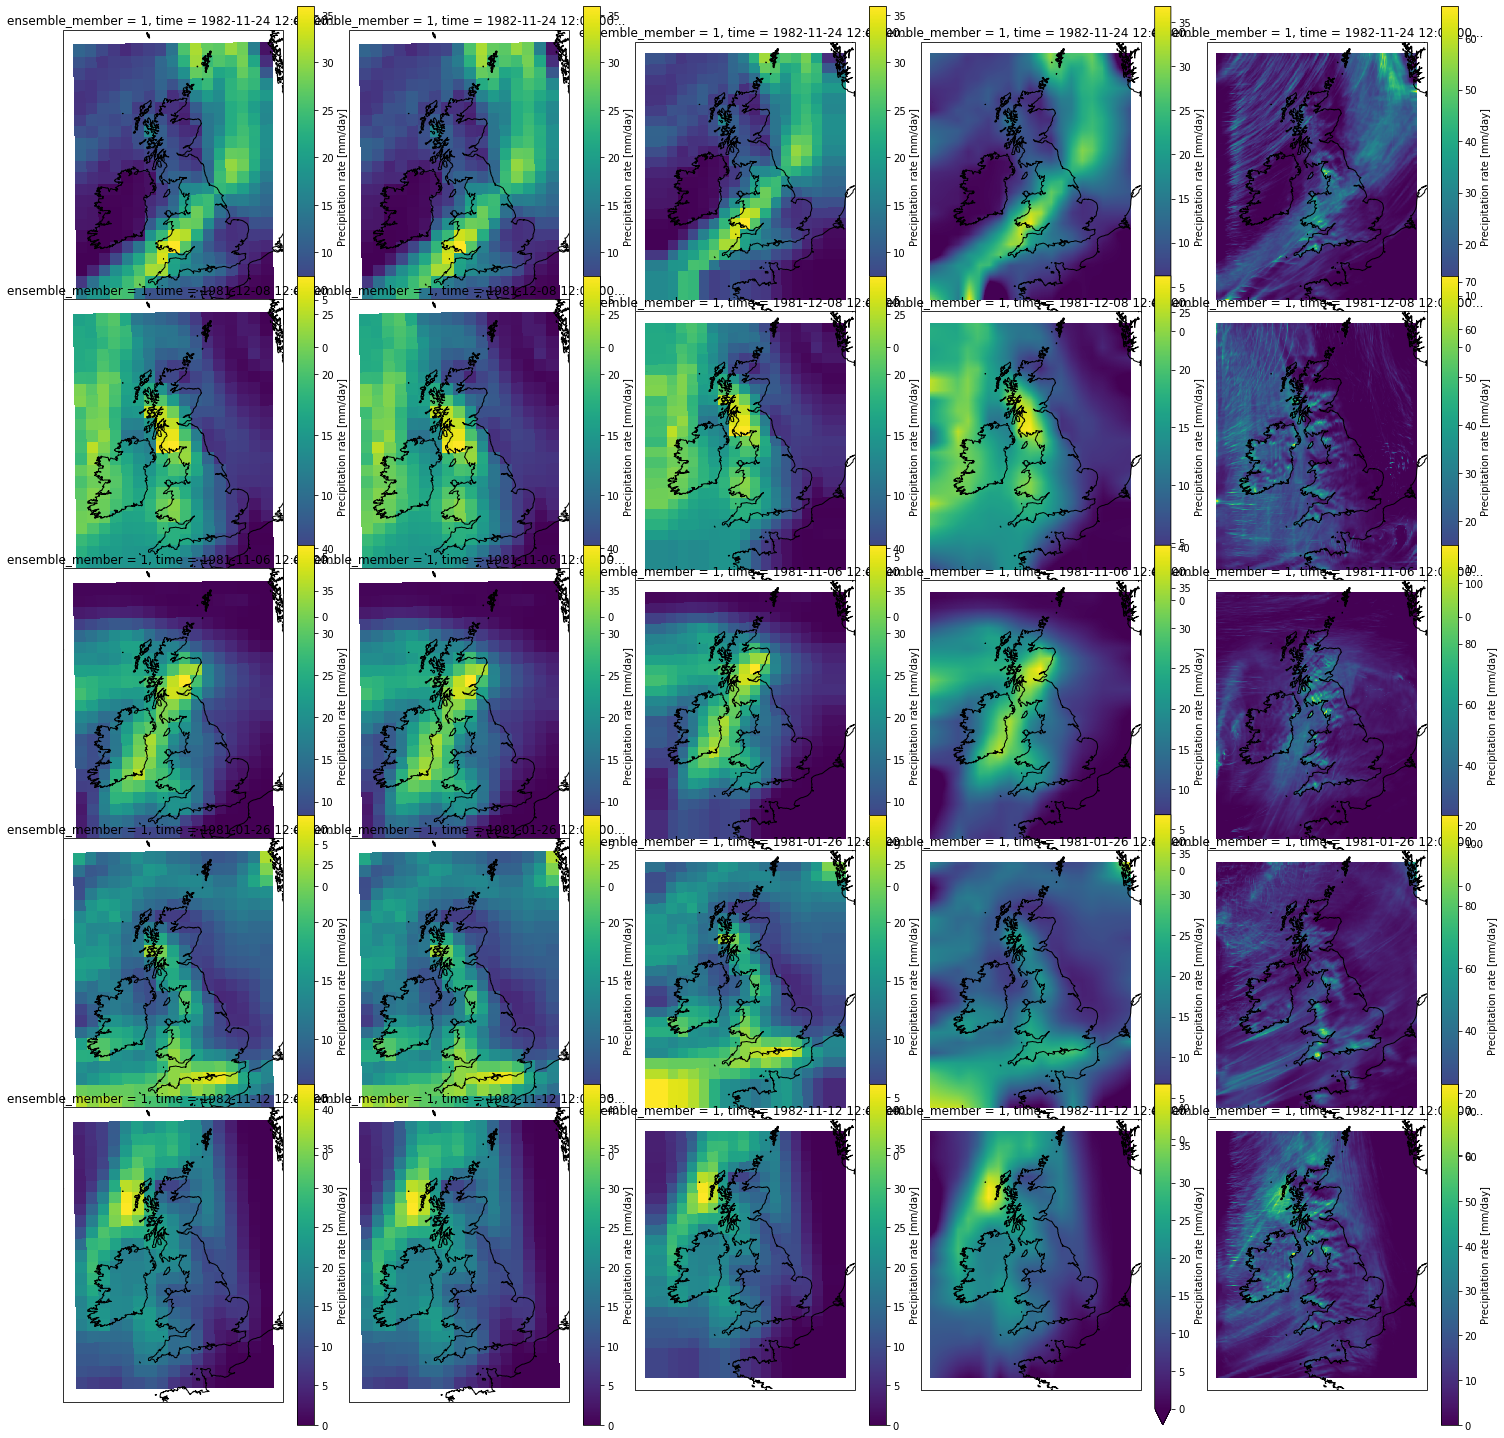

In [10]:
plot_with_ts([orig_gcm_data, gcm_data, regridded_nn_gcm_data, regridded_lin_gcm_data, cpm_data], five_wettest_gcm_days)

## Wettest days according to CPM

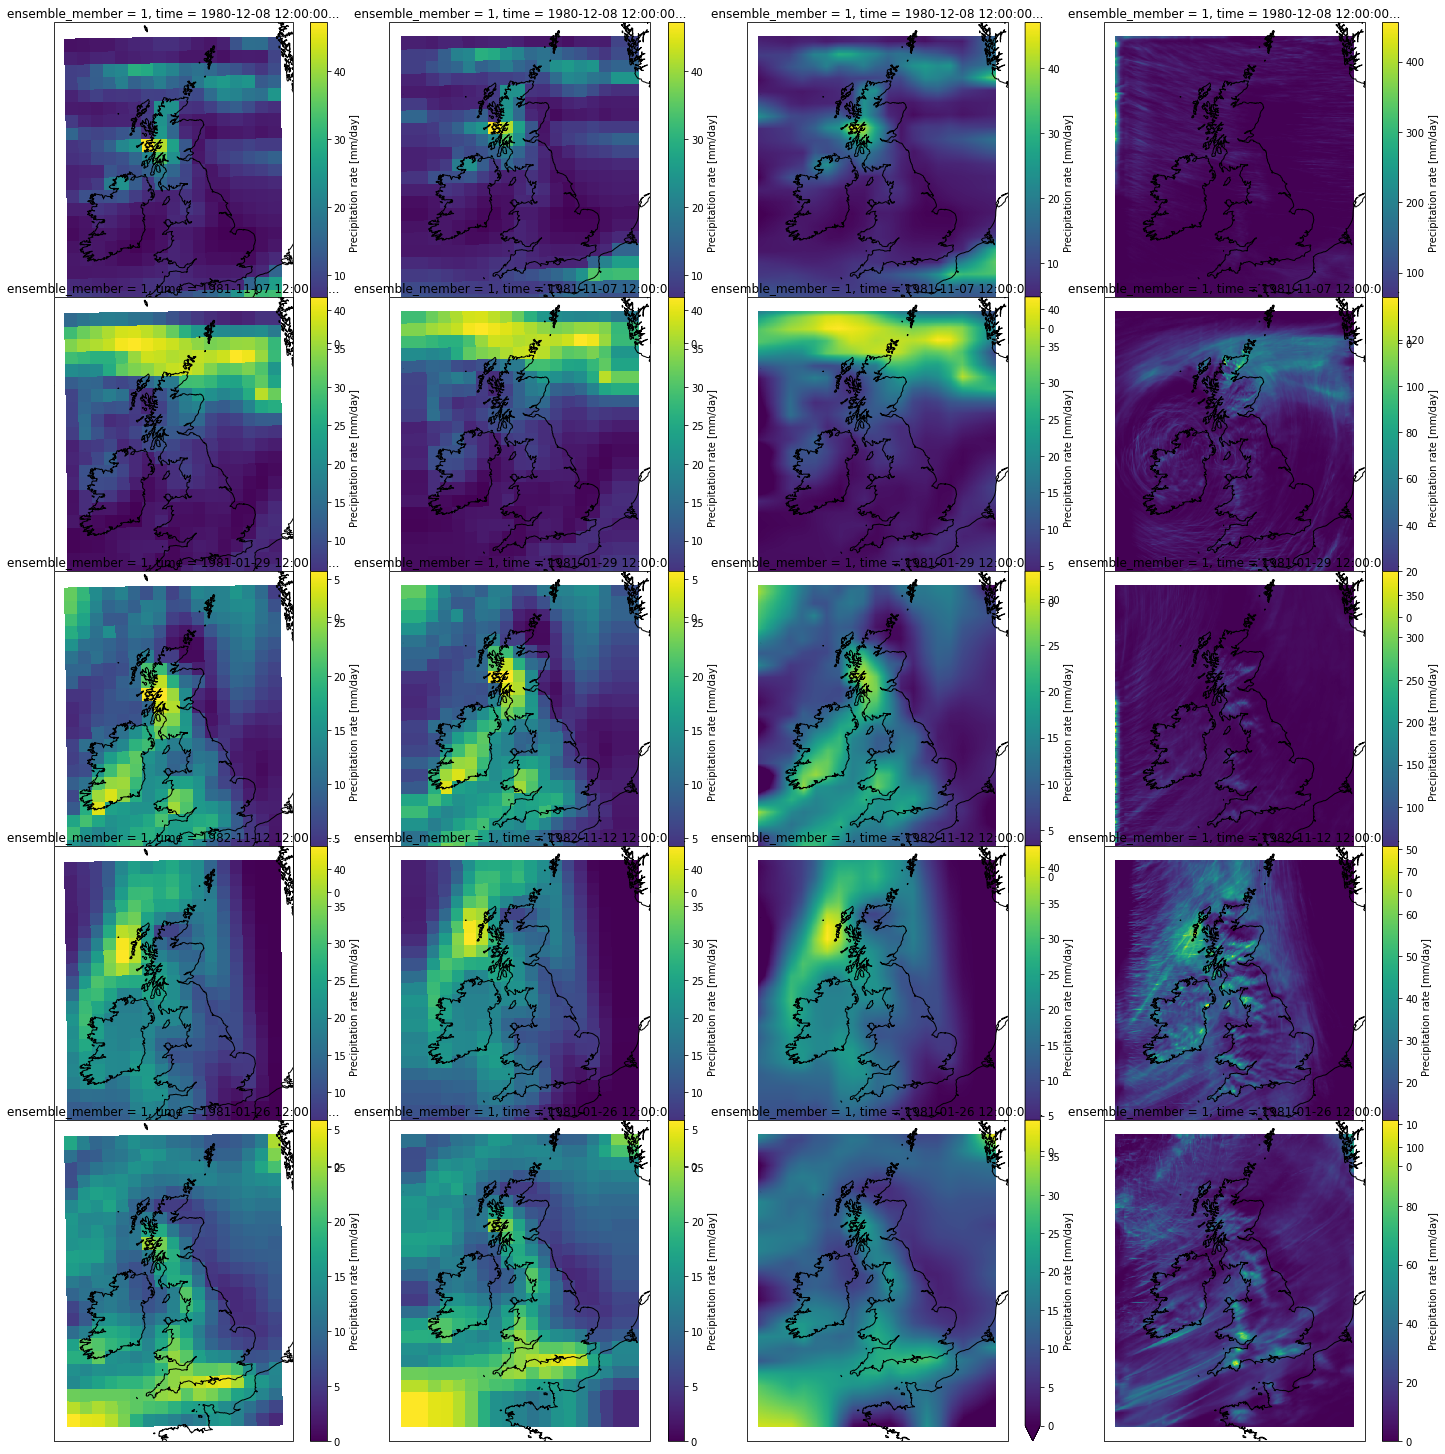

In [11]:
plot_with_ts([gcm_data, regridded_nn_gcm_data, regridded_lin_gcm_data, cpm_data], five_wettest_cpm_days)

Those wettest CPM days don't look that wet on the plot. Maybe the colour scale is different and/or there's something odd going on at the edges